In [35]:
import pandas as pd
import os
import numpy as np

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

In [36]:
countries= ['Ecuador', 'Portugal', 'Panama', 'Italy', 'Germany', 'Finland',
            'Estonia', 'Hungary', 'Spain', 'Peru', 'Slovakia', 'Ireland',
            'Indonesia', 'Iceland', 'Brazil', 'Canada', 'Belgium', 'Uruguay',
            'Costa Rica', 'Malaysia', 'Mexico', 'France', 'Argentina', 'Norway',
            'Lithuania', 'Philippines', 'Taiwan', 'New Zealand', 'Turkey',
            'United States of America', 'El Salvador', 'Chile', 'Japan', 'Honduras', 'Guatemala',
            'Switzerland', 'Denmark', 'Bolivia (Plurinational State of)', 'Poland', 'Austria', 'Sweden',
            'Czechia', 'Netherlands', 'Colombia', 'Singapore',
            'Dominican Republic', 'Luxembourg', 'United Kingdom of Great Britain and Northern Ireland', 'Paraguay',
            'Australia', 'Latvia', 'Greece', 'Hong Kong', 'Russian Federation',
            'United Arab Emirates', 'Belarus', 'India', 'South Africa', 'Romania',
            'Ukraine', 'Egypt', 'Nigeria', 'Korea, Republic of', 'Kazakhstan',
            'Saudi Arabia', 'Nicaragua', 'Morocco', 'Israel', 'Bulgaria', 'Viet Nam']

In [37]:
spotify_countries= ['Ecuador', 'Portugal', 'Panama', 'Italy', 'Germany', 'Finland',
               'Estonia', 'Hungary', 'Spain', 'Peru', 'Slovakia', 'Ireland',
               'Indonesia', 'Iceland', 'Brazil', 'Canada', 'Belgium', 'Uruguay',
               'CostaRica', 'Malaysia', 'Mexico', 'France', 'Argentina', 'Norway',
               'Lithuania', 'Philippines', 'Taiwan', 'NewZealand', 'Turkey',
               'USA', 'ElSalvador', 'Chile', 'Japan', 'Honduras', 'Guatemala',
               'Switzerland', 'Denmark', 'Bolivia', 'Poland', 'Austria', 'Sweden',
               'CzechRepublic', 'Netherlands', 'Columbia', 'Singapore',
               'DominicanRepublic', 'Luxemborg', 'UnitedKingdom', 'Paraguay',
               'Australia', 'Latvia', 'Greece', 'HongKong', 'Russia',
               'UnitedArabEmirates', 'Belarus', 'India', 'SouthAfrica', 'Romania',
               'Ukraine', 'Egypt', 'Nigeria', 'Korea', 'Kazakhstan',
               'SaudiArabia', 'Nicaragua', 'Marocco', 'Israel', 'Bulgaria',
               'Vietnam']

In [38]:
raw_to_spotify_country_name = {r:s for r,s in zip(countries, spotify_countries)}
raw_to_spotify_country_name

{'Ecuador': 'Ecuador',
 'Portugal': 'Portugal',
 'Panama': 'Panama',
 'Italy': 'Italy',
 'Germany': 'Germany',
 'Finland': 'Finland',
 'Estonia': 'Estonia',
 'Hungary': 'Hungary',
 'Spain': 'Spain',
 'Peru': 'Peru',
 'Slovakia': 'Slovakia',
 'Ireland': 'Ireland',
 'Indonesia': 'Indonesia',
 'Iceland': 'Iceland',
 'Brazil': 'Brazil',
 'Canada': 'Canada',
 'Belgium': 'Belgium',
 'Uruguay': 'Uruguay',
 'Costa Rica': 'CostaRica',
 'Malaysia': 'Malaysia',
 'Mexico': 'Mexico',
 'France': 'France',
 'Argentina': 'Argentina',
 'Norway': 'Norway',
 'Lithuania': 'Lithuania',
 'Philippines': 'Philippines',
 'Taiwan': 'Taiwan',
 'New Zealand': 'NewZealand',
 'Turkey': 'Turkey',
 'United States of America': 'USA',
 'El Salvador': 'ElSalvador',
 'Chile': 'Chile',
 'Japan': 'Japan',
 'Honduras': 'Honduras',
 'Guatemala': 'Guatemala',
 'Switzerland': 'Switzerland',
 'Denmark': 'Denmark',
 'Bolivia (Plurinational State of)': 'Bolivia',
 'Poland': 'Poland',
 'Austria': 'Austria',
 'Sweden': 'Sweden',
 '

In [39]:
country_alpha2_df = pd.read_csv(os.path.join('data', 'country_codes_alpha2.csv'))
country_alpha2_df= country_alpha2_df['name alpha-2'.split()]

In [40]:
target_country_alpha2= country_alpha2_df[country_alpha2_df['name'].isin(countries)].copy()
target_country_alpha2['name_spotify']= target_country_alpha2['name'].apply(lambda c: raw_to_spotify_country_name[c])
target_country_alpha2.tail()

,name,alpha-2,name_spotify
233,United Arab Emirates,AE,UnitedArabEmirates
234,United Kingdom of Great Britain and Northern I...,GB,UnitedKingdom
235,United States of America,US,USA
237,Uruguay,UY,Uruguay
241,Viet Nam,VN,Vietnam


In [41]:
target_country_alpha2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 10 to 241
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          69 non-null     object
 1   alpha-2       69 non-null     object
 2   name_spotify  69 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [42]:
lmf2b_df= pd.read_csv(os.path.join('data', 'LMF-2b','n_listenings_per_country.csv'))
target_lmf2b_df = lmf2b_df[lmf2b_df['country'].isin(target_country_alpha2['alpha-2'])]
target_lmf2b_df= target_lmf2b_df.rename(columns={'track_id':'song_id', 
                                                 'country': 'Region_lfm', 
                                                 '0':'Streams', 'date':'Date'})
target_lmf2b_df['Date']= pd.to_datetime(target_lmf2b_df['Date'])
target_lmf2b_df.head()

,song_id,Region_lfm,Date,Streams
0,159,UA,2019-01-23,13
1,257,RU,2010-12-06,28
2,338,RU,2016-03-20,14
3,345,AU,2013-10-25,12
4,345,AU,2015-02-06,14


Total number of countries in the dataset

In [45]:
lmf2b_df['country'].nunique()

196

Change the names of the countries to the Spotify acronyms

In [9]:
target_country_alpha2= target_country_alpha2.set_index('alpha-2',drop=True)
target_lmf2b_df['Region']=target_lmf2b_df['Region_lfm'].apply(lambda c: target_country_alpha2.loc[c,'name_spotify'])
target_lmf2b_df= target_lmf2b_df.drop(columns='Region_lfm')

In [10]:
target_lmf2b_df.head()

,song_id,Date,Streams,Region
0,159,2019-01-23,13,Ukraine
1,257,2010-12-06,28,Russia
2,338,2016-03-20,14,Russia
3,345,2013-10-25,12,Australia
4,345,2015-02-06,14,Australia


In [11]:
n_total_songs= target_lmf2b_df['song_id'].nunique()
print(f'The number of total songs is {n_total_songs}')

The number of total songs is 850998


### We remove songs in only one country

In [12]:
countries_per_song= target_lmf2b_df.groupby('song_id')['Region'].nunique()
countries_per_song

song_id
159         1
257         1
338         1
345         1
354         1
           ..
50811762    1
50811861    1
50811908    1
50812183    1
50812245    1
Name: Region, Length: 850998, dtype: int64

In [13]:
traveller_songs= countries_per_song[countries_per_song>1].index.tolist()

In [14]:
target_lmf2b_df= target_lmf2b_df[target_lmf2b_df['song_id'].isin(traveller_songs)]

In [15]:
target_lmf2b_df['Date'].min(), target_lmf2b_df['Date'].max()

(Timestamp('2005-02-18 00:00:00'), Timestamp('2020-03-20 00:00:00'))

In [16]:
target_lmf2b_df['Region'].unique()

array(['Belarus', 'Russia', 'Brazil', 'Germany', 'Finland', 'Norway',
       'USA', 'Turkey', 'Ukraine', 'Australia', 'Sweden', 'Poland',
       'Belgium', 'Bulgaria', 'Chile', 'Egypt', 'Italy', 'Japan',
       'Kazakhstan', 'Lithuania', 'Latvia', 'Netherlands', 'Romania',
       'Slovakia', 'Canada', 'Indonesia', 'Marocco', 'Spain',
       'Switzerland', 'HongKong', 'France', 'Iceland', 'Estonia',
       'NewZealand', 'CzechRepublic', 'Denmark', 'Argentina', 'Hungary',
       'Austria', 'Malaysia', 'Portugal', 'Columbia', 'Greece', 'Mexico',
       'Vietnam', 'Ecuador', 'Philippines', 'Ireland', 'Uruguay', 'Peru',
       'CostaRica', 'Singapore', 'India', 'Guatemala', 'ElSalvador',
       'SouthAfrica', 'Luxemborg', 'SaudiArabia', 'Korea', 'Bolivia',
       'Honduras', 'Paraguay', 'Israel', 'Nicaragua', 'DominicanRepublic',
       'UnitedArabEmirates', 'Panama'], dtype=object)

In [17]:
def generate_songs_timeseries_fn(clean_ranking_df_):
    num_countries_lst = []
    total_countries_per_song = {}
    songs_ids = clean_ranking_df_['song_id'].unique()
    
    
    for song_id in tqdm(clean_ranking_df_['song_id'].unique()):
        song_df =clean_ranking_df_[clean_ranking_df_['song_id']==song_id]
        song_dates = song_df['Date'].unique()
        song_dates.sort()
        num_day = 1
        for d in song_dates:
            song_date_df = song_df[song_df['Date']==d]
            
            current_countries = set(song_date_df['Region'].unique())
            total_countries =total_countries_per_song.get(song_id,set())
            
            in_countries = current_countries - total_countries
            out_countries = total_countries- current_countries


            total_countries=total_countries.union(current_countries)
            total_countries_per_song[song_id]= total_countries


            num_countries_lst.append((song_id,num_day,len(total_countries), len(current_countries), len(in_countries), len(out_countries)))
            
            #print(d, num_countries)
            #num_countries_lst.append((song_id,num_day,num_countries))
            num_day +=1
    num_countries_df_ = pd.DataFrame.from_records(num_countries_lst, columns='song_id num_day total_countries current_countries inc dec'.split())
    num_countries_df_.to_csv(os.path.join('data', 'raw_songs_timeseries_lfm.csv'))
    return num_countries_df_

In [18]:
songs_ts =generate_songs_timeseries_fn(target_lmf2b_df)

  0%|          | 0/171502 [00:00<?, ?it/s]

In [19]:
songs_ts['inc'].value_counts(bins=5)

(-0.018000000000000002, 3.4]    1483129
(3.4, 6.8]                          277
(6.8, 10.2]                          30
(10.2, 13.6]                          6
(13.6, 17.0]                          3
Name: inc, dtype: int64

### Remove songs that propagates to more than 10 countries in a single day

In [20]:
songs_to_remove= songs_ts[songs_ts['inc']>10]['song_id'].unique()
songs_to_remove

array([12261938, 16466500, 18138539, 18551625, 24623773, 30823152,
       44463635, 45393854, 47837664])

### Enrich the dataset with new features and save for further processing

In [21]:
import datetime
initial_date= datetime.datetime(2005, 2, 18)
def get_day_of_study_fn(d):
    return (d-initial_date).days

In [22]:
songs_clean_ts= songs_ts[~songs_ts['song_id'].isin(songs_to_remove)]
clean_lmf2b_df= target_lmf2b_df[~target_lmf2b_df['song_id'].isin(songs_to_remove)]

clean_lmf2b_df['release_date']=clean_lmf2b_df.groupby('song_id')['Date'].transform('min')
clean_lmf2b_df['day_of_study'] = clean_lmf2b_df['Date'].apply(get_day_of_study_fn)

/tmp/ipykernel_3820507/1254436448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_lmf2b_df['release_date']=clean_lmf2b_df.groupby('song_id')['Date'].transform('min')
/tmp/ipykernel_3820507/1254436448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_lmf2b_df['day_of_study'] = clean_lmf2b_df['Date'].apply(get_day_of_study_fn)


In [23]:
clean_lmf2b_df.head()

,song_id,Date,Streams,Region,release_date,day_of_study
18,991,2016-12-22,11,Belarus,2016-12-22,4325
19,991,2017-01-23,22,Belarus,2016-12-22,4357
20,991,2017-01-24,27,Belarus,2016-12-22,4358
21,991,2016-12-29,11,Russia,2016-12-22,4332
86,4774,2012-08-22,11,Brazil,2012-06-13,2742


In [24]:
clean_lmf2b_df['Position']=clean_lmf2b_df.groupby('Region Date'.split())['Streams'].rank(method='min')

/tmp/ipykernel_3820507/2896674645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_lmf2b_df['Position']=clean_lmf2b_df.groupby('Region Date'.split())['Streams'].rank(method='min')


In [25]:
clean_lmf2b_df[(clean_lmf2b_df['Date']=='2016-12-22') &
              (clean_lmf2b_df['Region']=='Belarus')].sort_values('Streams')

,song_id,Date,Streams,Region,release_date,day_of_study,Position
18,991,2016-12-22,11,Belarus,2016-12-22,4325,1.0
65823,3308946,2016-12-22,11,Belarus,2016-03-06,4325,1.0
122216,4310797,2016-12-22,11,Belarus,2016-05-23,4325,1.0
661313,12691668,2016-12-22,11,Belarus,2016-05-23,4325,1.0
869460,15921294,2016-12-22,11,Belarus,2016-05-23,4325,1.0
938880,16998863,2016-12-22,11,Belarus,2016-04-11,4325,1.0
954642,17219098,2016-12-22,11,Belarus,2016-05-23,4325,1.0
1823922,30908690,2016-12-22,11,Belarus,2016-05-23,4325,1.0
2375794,39676265,2016-12-22,11,Belarus,2016-05-23,4325,1.0
2914259,48605468,2016-12-22,11,Belarus,2016-12-22,4325,1.0


In [26]:
clean_lmf2b_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522605 entries, 18 to 3020060
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   song_id       1522605 non-null  int64         
 1   Date          1522605 non-null  datetime64[ns]
 2   Streams       1522605 non-null  int64         
 3   Region        1522605 non-null  object        
 4   release_date  1522605 non-null  datetime64[ns]
 5   day_of_study  1522605 non-null  int64         
 6   Position      1522605 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 92.9+ MB


In [27]:
clean_lmf2b_df.to_csv(os.path.join('data', 'LMF-2b','clean_ranking_2005_2020_lfm.csv'))

### Show some of the features of the dataset

In [28]:
print(f'Num of songs: {songs_clean_ts.song_id.nunique()}, ({round(songs_clean_ts.song_id.nunique()/n_total_songs,3)} %)')
print(f'Max. total number of countries for a song: {songs_clean_ts.total_countries.max()}')
print(f'Min. total number of countries for a song: {songs_clean_ts.total_countries.min()}')
print(f'Max. current number of countries for a song: {songs_clean_ts.current_countries.max()}')
print(f'Max. increment for a song: {songs_clean_ts.inc.max()}')
print(f'Max. decrement for a song: {songs_clean_ts.dec.max()}')

Num of songs: 171493, (0.202 %)
Max. total number of countries for a song: 47
Min. total number of countries for a song: 1
Max. current number of countries for a song: 17
Max. increment for a song: 10
Max. decrement for a song: 46


In [29]:
def plot_all_songs_evol_fn(songs_ts_, col_name):
    ax= None
    song_ids=songs_ts_['song_id'].sample(50)
    for song_id in song_ids:
        if ax is None:
            ax=songs_ts_[songs_ts_['song_id']==song_id].plot(x='num_day',y=col_name, legend=False)
        else:
            songs_ts_[songs_ts_['song_id']==song_id].plot(ax=ax,x='num_day',y=col_name, legend=False)

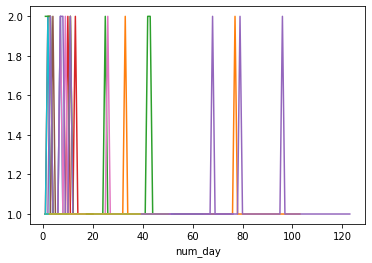

In [30]:
plot_all_songs_evol_fn(songs_clean_ts, 'current_countries')

In [31]:
min_day_df = songs_clean_ts.groupby('song_id total_countries'.split()).agg({'num_day':min})
min_day_df = min_day_df.reset_index()
min_day_df.head()

,song_id,total_countries,num_day
0,991,1,1
1,991,2,2
2,4774,1,1
3,4774,2,2
4,4774,3,4


### Plot propagation evolution

In [32]:
total_days_range = min_day_df['num_day'].unique()

dict_={}
for d in total_days_range:
    days_= min_day_df[min_day_df['num_day']==d]['total_countries'].values
    dict_[d]= days_
    
days_df= pd.DataFrame.from_dict(dict_,orient='index').sort_index().T

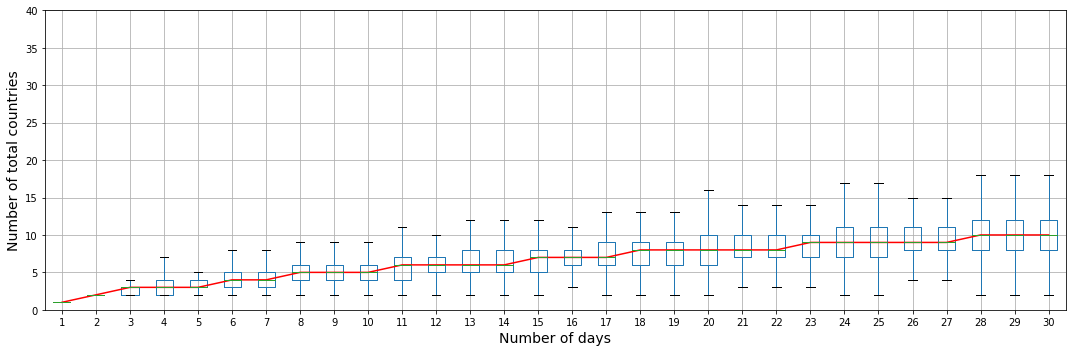

In [33]:
days_to_show= 31
countries_to_show=40
ax=days_df[np.arange(1,days_to_show)].boxplot(figsize=(15,5), grid=True, showfliers=False);
days_df[np.arange(1,days_to_show)].median(axis=0).plot(ax=ax, color='red', grid=True);
ax.set_xlabel('Number of days', fontsize=14)
ax.set_ylabel('Number of total countries', fontsize=14)
ax.set_yticks(np.arange(0,countries_to_show+1,5))
plt.tight_layout()
plt.savefig(os.path.join('figs', 'songs_evolution_lfm.png'))

In [34]:
print("That's all folks!")

That's all folks!
